In [8]:
# Import the necessary libraries and load the dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('Tweets.csv')


In [9]:
# Preprocess the text data by removing stopwords, converting all text to lowercase, and applying stemming
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stopwords]
    return " ".join(words)

df['text'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhakt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Use the TfidfVectorizer to convert the preprocessed text data into a vector of features
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text'])
y = df['airline_sentiment']


In [4]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train the KNN classifier and evaluate its performance on the testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.7114071038251366


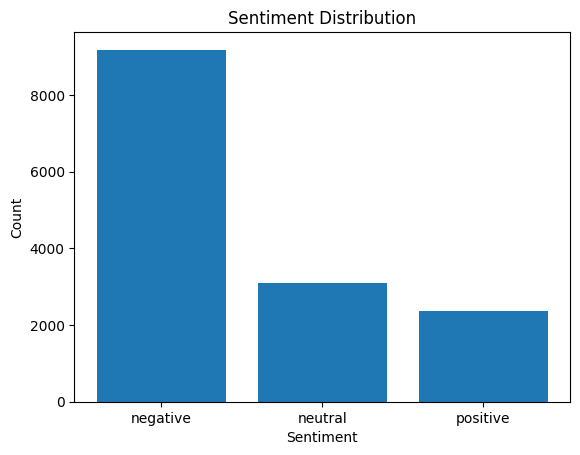

In [6]:
# This will display a bar plot showing the number of tweets for each sentiment label.
import matplotlib.pyplot as plt

sentiment_counts = df['airline_sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [7]:
# Extract counts of positive, negative, and neutral sentiments
positive_count = sentiment_counts['positive']
negative_count = sentiment_counts['negative']
neutral_count = sentiment_counts['neutral']

# Print the counts of positive, negative, and neutral sentiments
print("Number of Positive Sentiments:", positive_count)
print("Number of Negative Sentiments:", negative_count)
print("Number of Neutral Sentiments:", neutral_count)


Number of Positive Sentiments: 2363
Number of Negative Sentiments: 9178
Number of Neutral Sentiments: 3099
